In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from population_analyses import *
from vip_helpers import *

paths_df = pd.read_parquet('/home/gianna/Desktop/PythonProjects/VIPxTigerAnalyses/paths_df.parquet')
days = paths_df['day']
days = [day for day in days if day != 'p12']
dataclasses, state_dfs, s2p_outs, recording_days = load_animal_day_dict('Back_right')
dff_traces, spikes = {}, {}
state_dfs = {day:state_df for day, state_df in zip(days, state_dfs)}
s2p_outputs = {day:s2p_out for day, s2p_out in zip(days, s2p_outs)}
for day, s2p_out in zip(days, s2p_outs):
    dff_traces[day] = s2p_out.calc_deltaF()[0]
    spikes[day] = s2p_out.get_cell_spikes()

### FIGURE 2A: example raster + mean population activity for one pup early vs late.


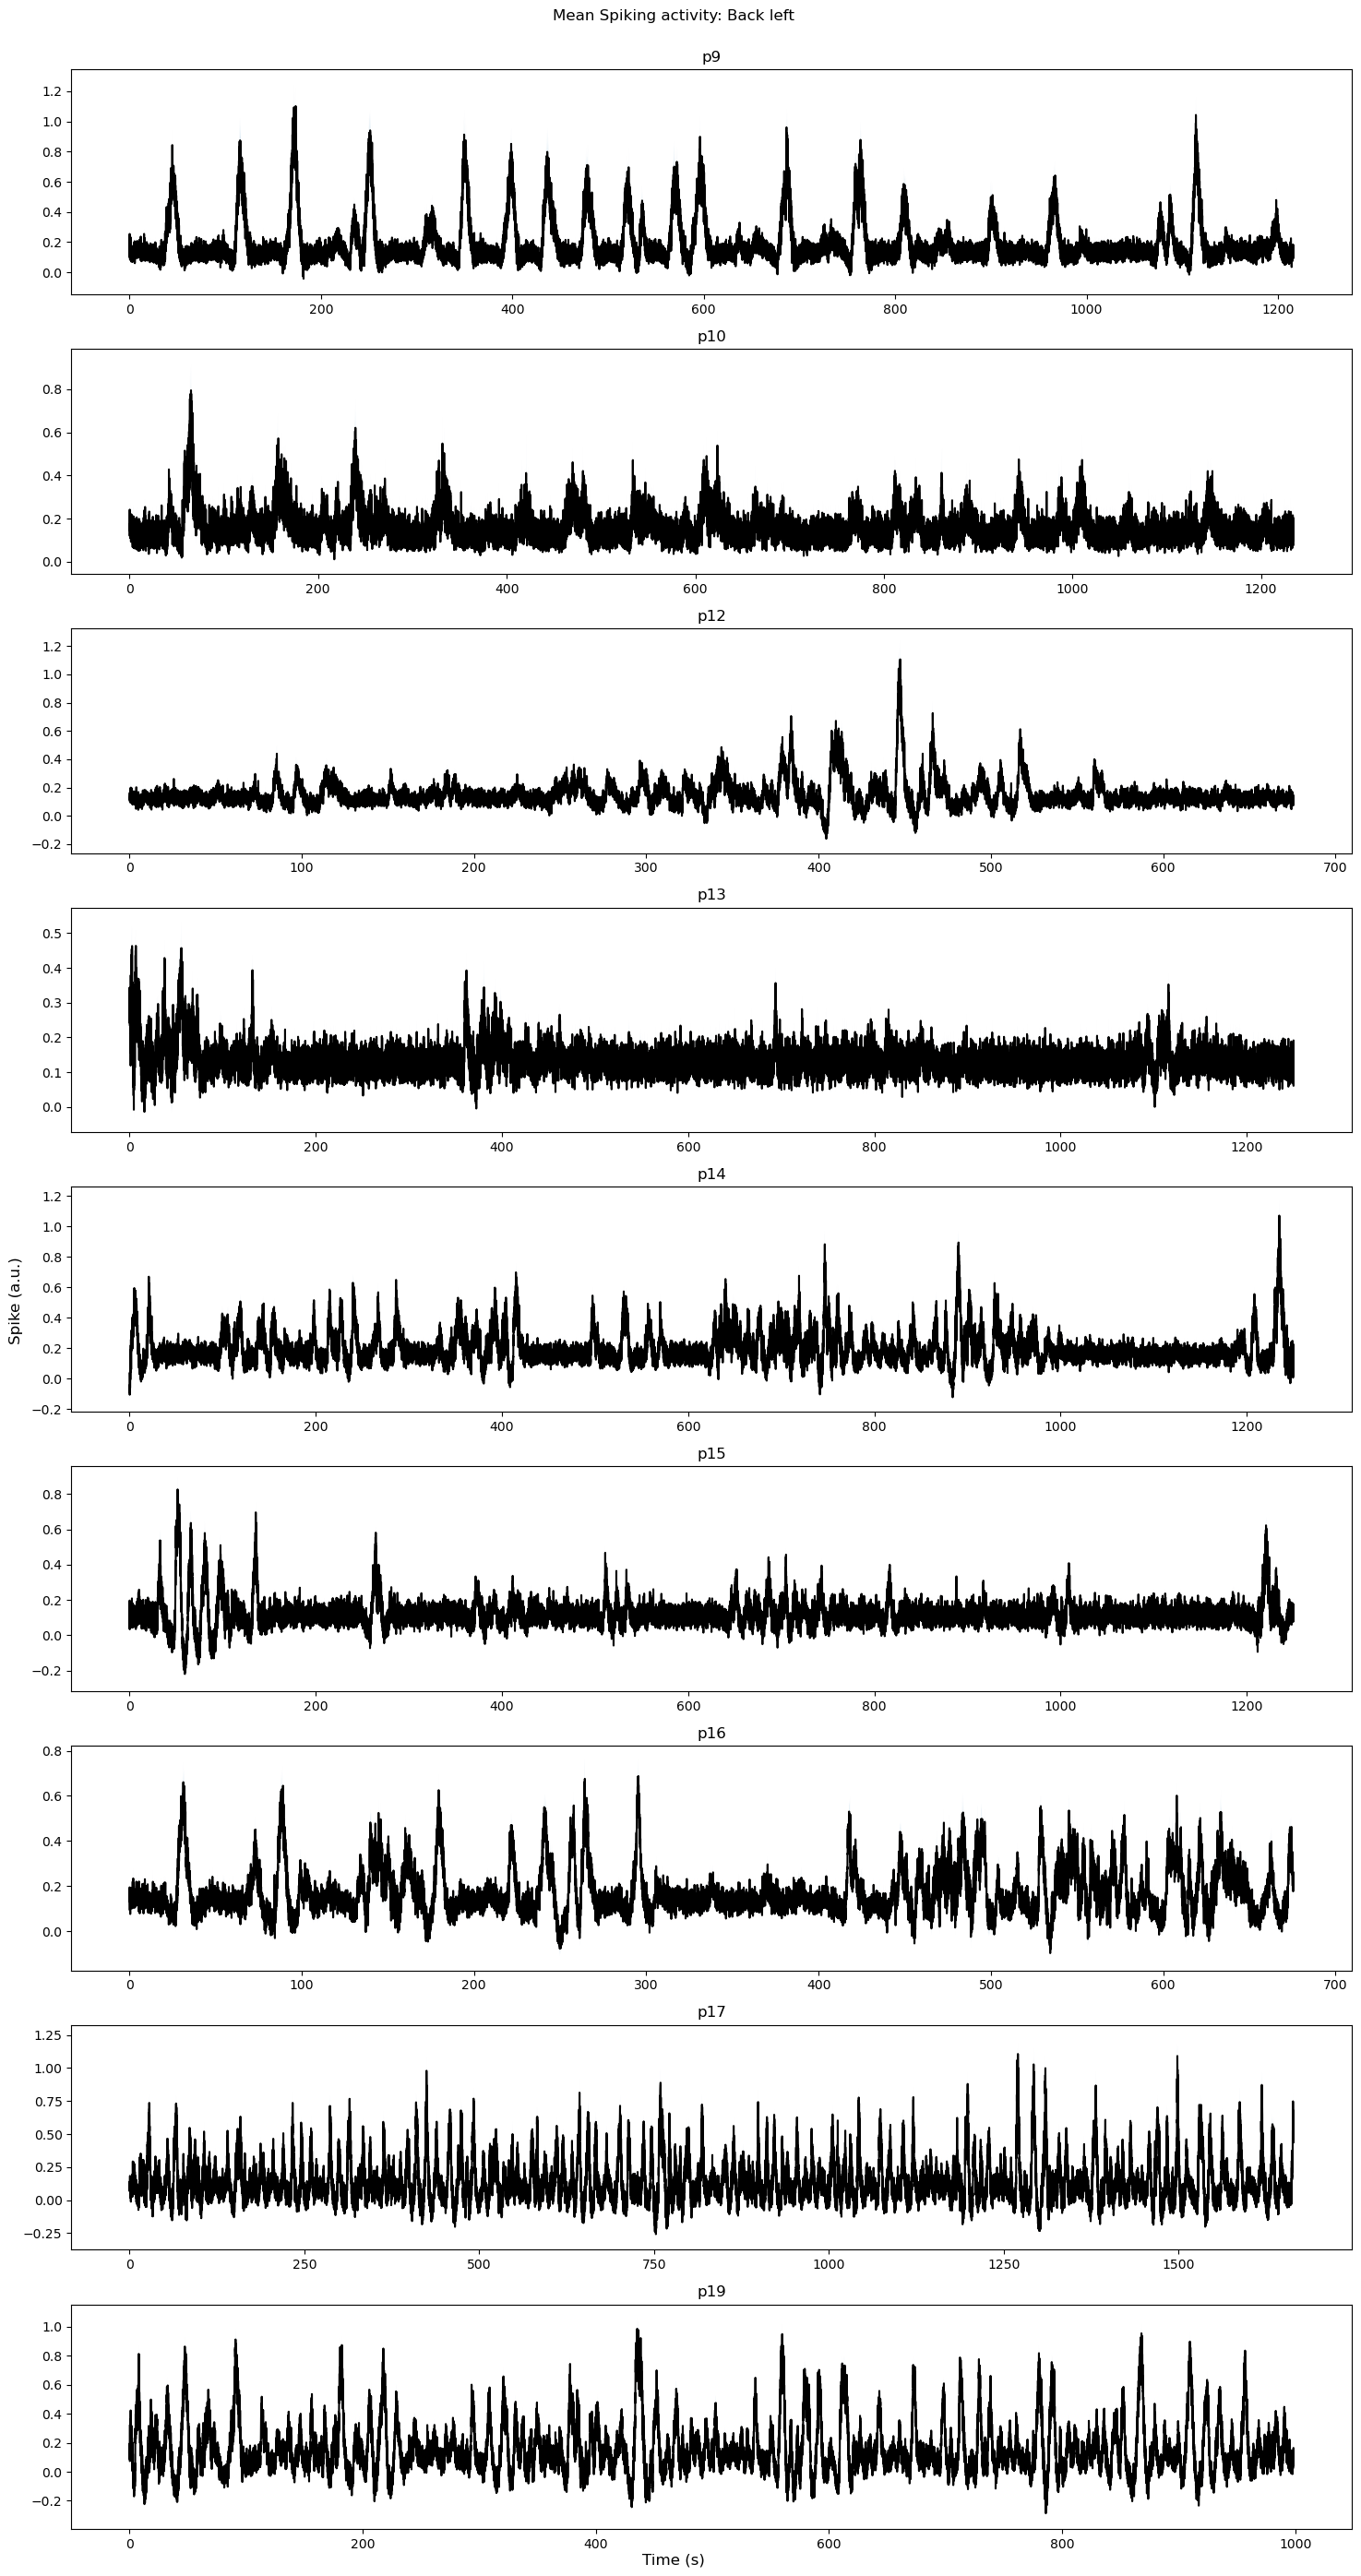

In [ ]:

fig, axs = plt.subplots(len(days), 1, figsize=(15, 28))
axs_idx = 0
for day, trace in dff_traces.items():
    plot_population_mean(trace, t = np.arange(trace.shape[1]) / s2p_outputs[day].scope_fs,
                         axs = axs[axs_idx], title = day)
    axs_idx += 1
fig.supylabel('Spike (a.u.)')
fig.supxlabel('Time (s)')
plt.suptitle('Mean Spiking activity: Back left', y=1.0)
plt.tight_layout()

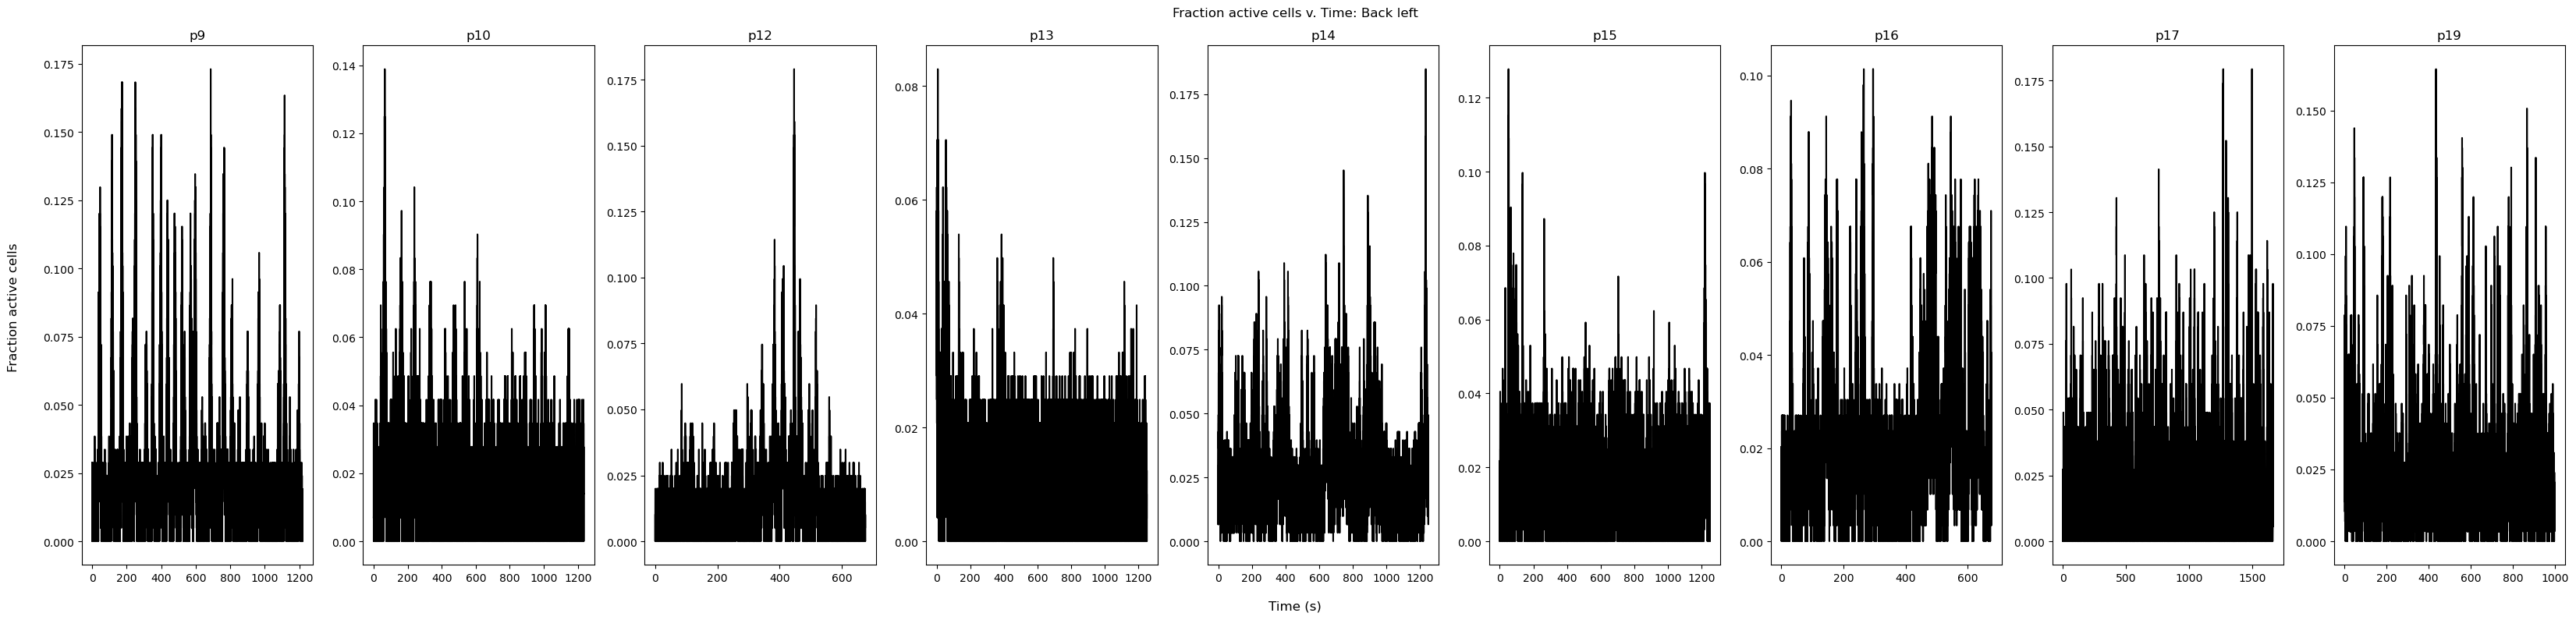

In [13]:
fig, axs = plt.subplots(1, len(days), figsize=(33, 8))
axs_idx = 0
for day, trace in dff_traces.items():
    plot_fraction_active(trace, t = np.arange(trace.shape[1]) / s2p_outputs[day].scope_fs,
                         axs = axs[axs_idx], title = day)
    axs_idx += 1
fig.supylabel('Fraction active cells', x = 0)
fig.supxlabel('Time (s)')
plt.suptitle('Fraction active cells v. Time: Back left')
plt.tight_layout()

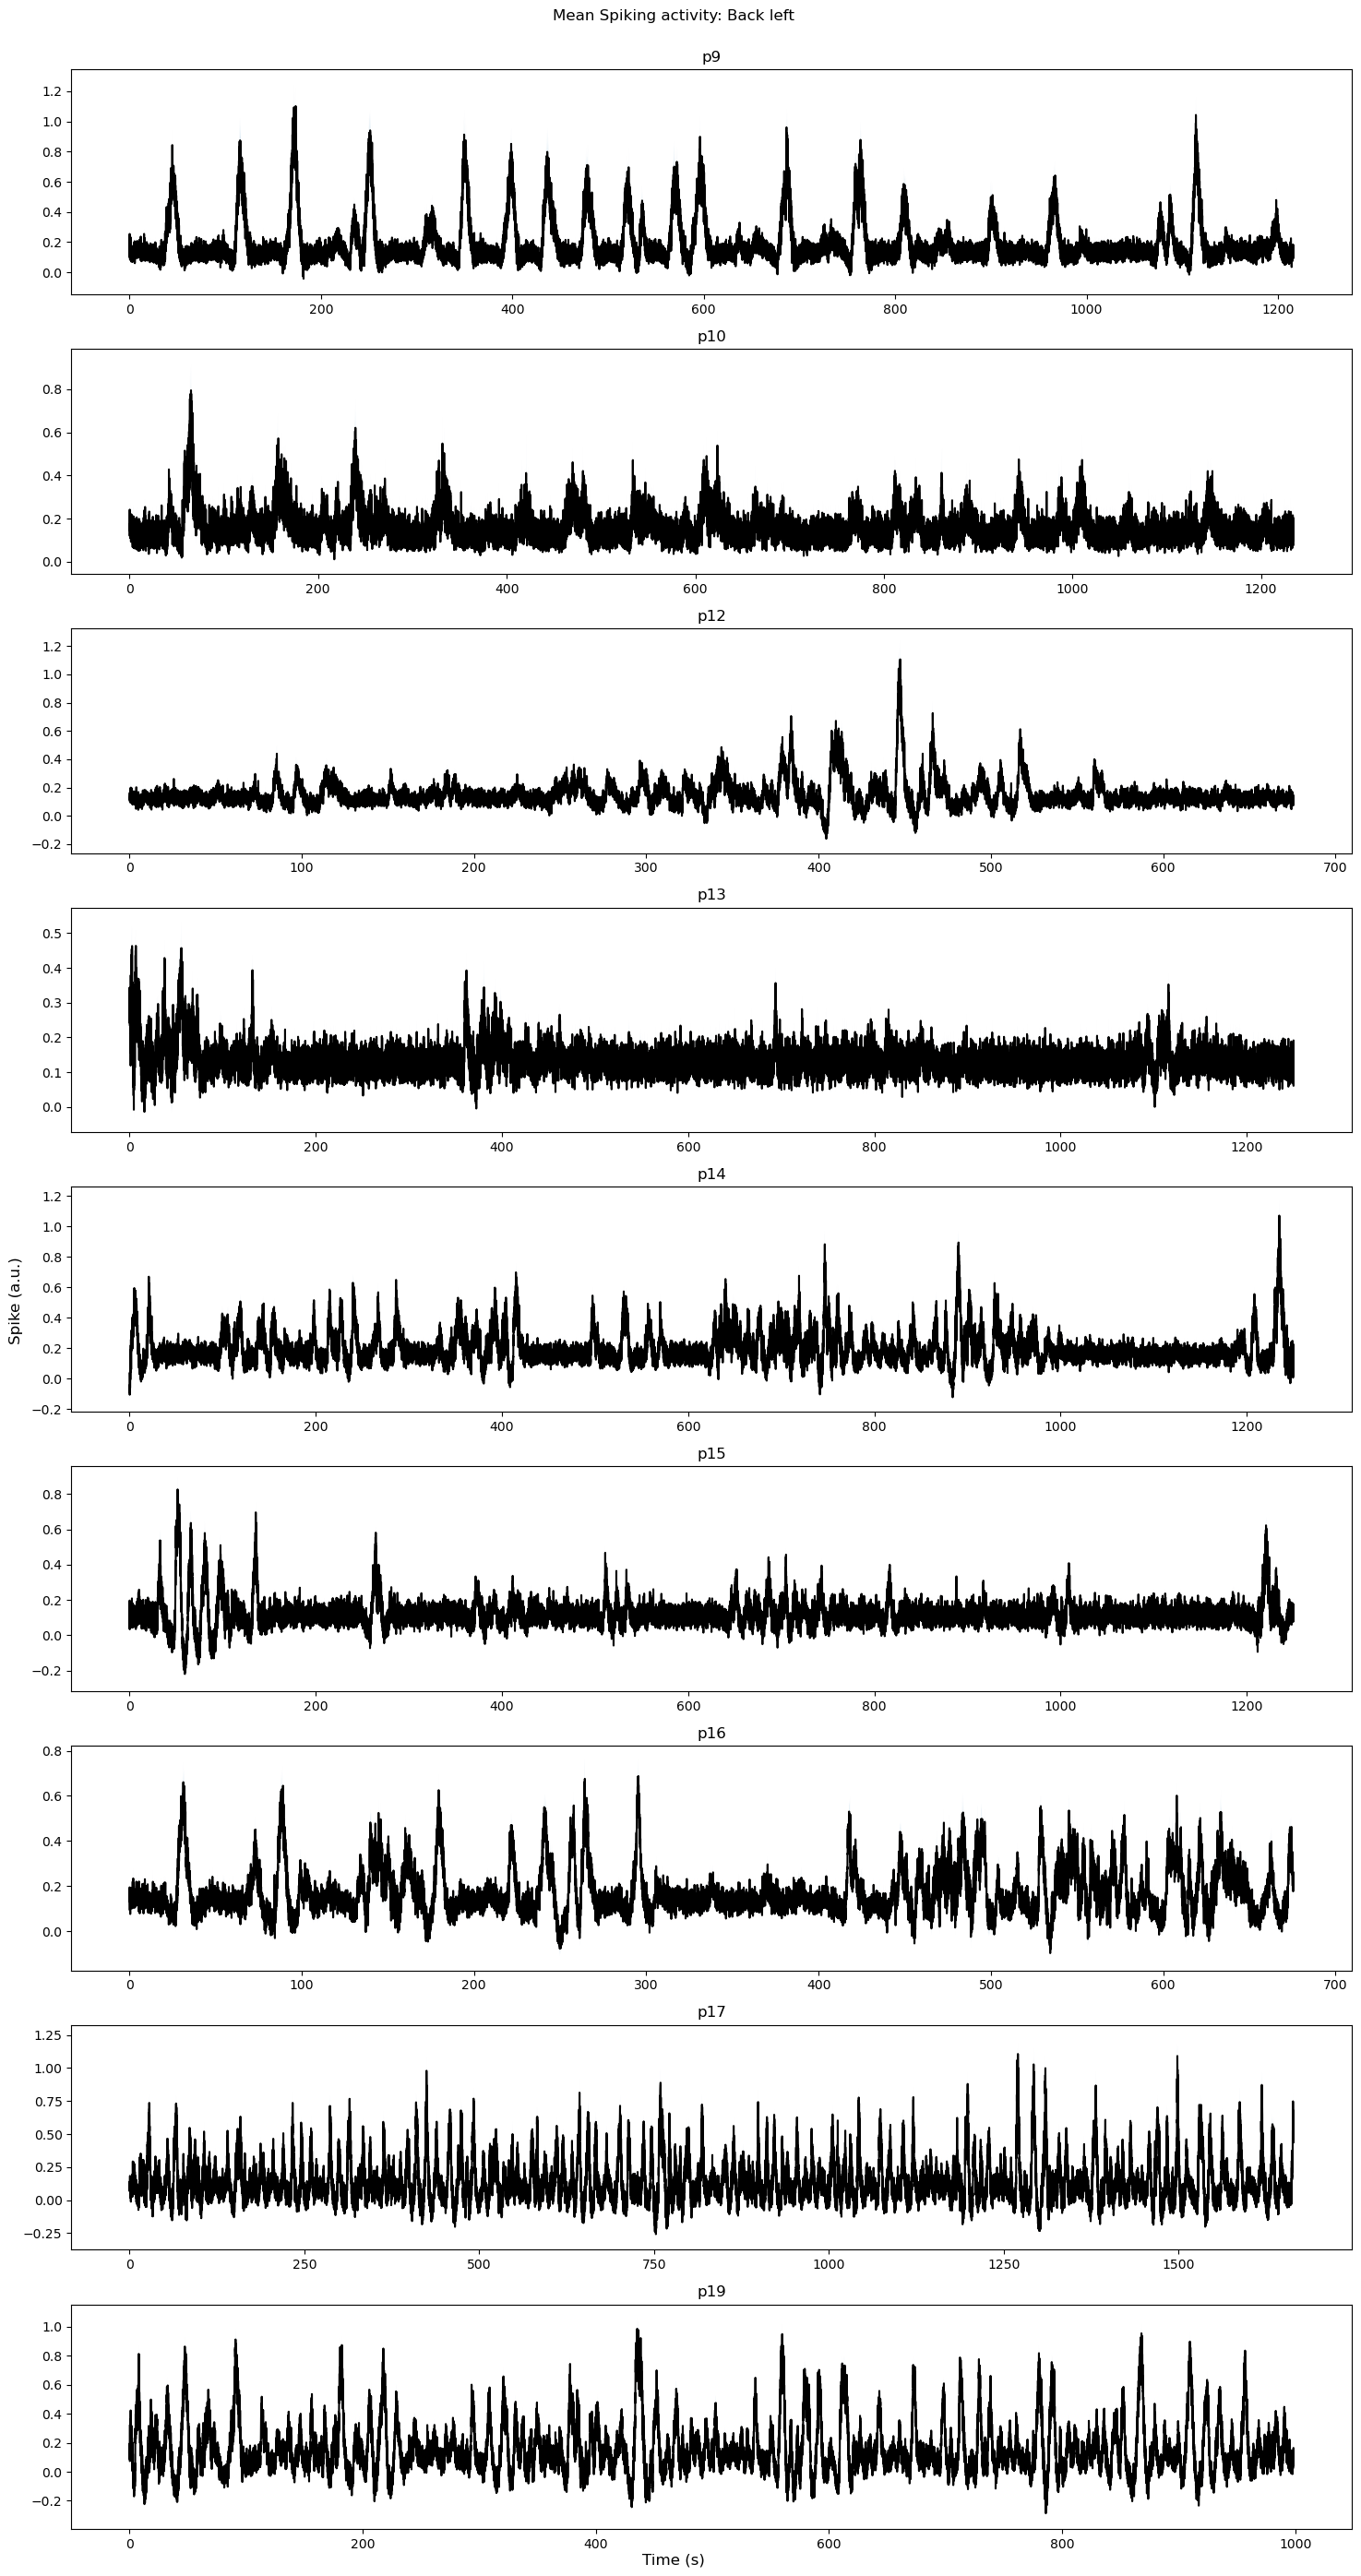

In [2]:
fig, axs = plt.subplots(len(days), 1, figsize=(15, 28))
axs_idx = 0
for day, trace in dff_traces.items():
    plot_population_mean(trace, t = np.arange(trace.shape[1]) / s2p_outputs[day].scope_fs,
                         axs = axs[axs_idx], title = day)
    axs_idx += 1
fig.supylabel('Spike (a.u.)')
fig.supxlabel('Time (s)')
plt.suptitle('Mean Spiking activity: Back left', y=1.0)
plt.tight_layout()

In [ ]:
synchrony_metrics_df = pd.DataFrame({'mean_frac_active': [], 'event_rate_per_min': [], 'median_pairwise_corr': []})
for day in days:
    recording_row = compute_synchrony_metrics(dff_traces[day], fs=s2p_outputs[day].scope_fs)
    recording_row = {metric_name:[value] for metric_name, value in recording_row.items()}
    synchrony_metrics_df = pd.concat([synchrony_metrics_df, pd.DataFrame(recording_row, index=[day])], axis=0)
synchrony_metrics_df

,mean_frac_active,event_rate_per_min,median_pairwise_corr
p9,0.229068,101.066925,0.019796
p10,0.237463,107.600400,0.005695
p12,0.190064,67.742955,0.024002
p13,0.225409,109.229546,0.005142
p14,0.211656,79.042646,0.023192
p15,0.120877,18.428886,0.019447
p16,0.212464,74.490615,0.024142
p17,0.120716,23.830108,0.078438
p19,0.122756,24.575174,0.097167


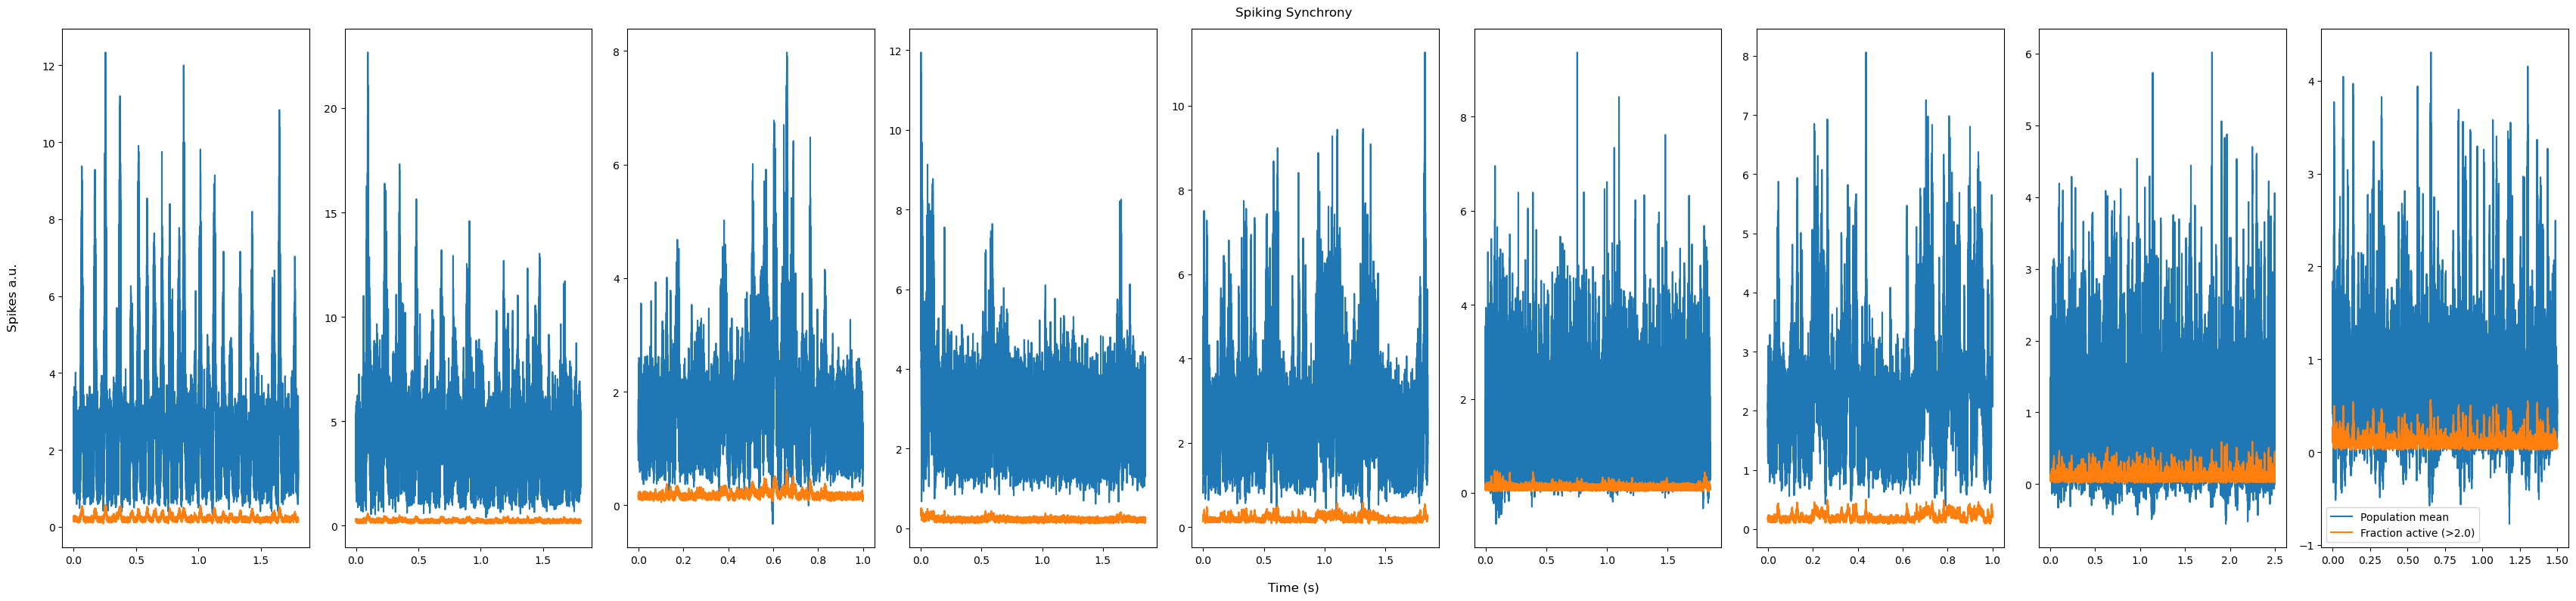

In [30]:
fig, axs = plt.subplots(1, len(days), figsize=(34, 8))
axs_idx = 0
for day, trace in dff_traces.items():
    plot_synchrony(dff_traces[day], t = np.arange(dff_traces[day].shape[1]) / 20e3, axs = axs[axs_idx])
    axs_idx += 1
plt.legend()
fig.supxlabel('Time (s)', x=0.5)
fig.supylabel('Spikes a.u.', x=0)
plt.suptitle('Spiking Synchrony')
plt.tight_layout()
plt.show()